<a href="https://colab.research.google.com/github/ZainabRashid/testingabc/blob/main/ai_ml_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')
print(df.shape)
print(df.columns)
print(df.head())

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

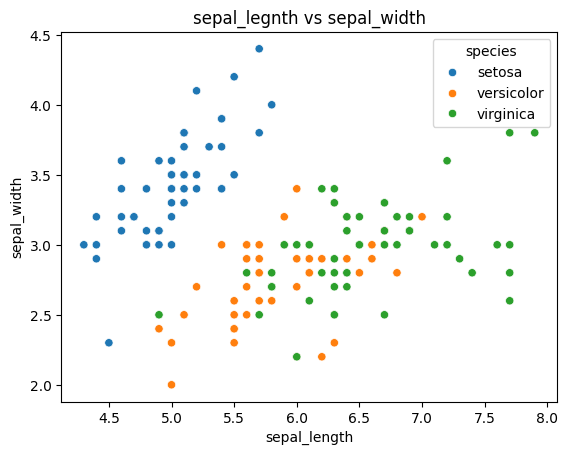

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.title('sepal_legnth vs sepal_width')
plt.show()

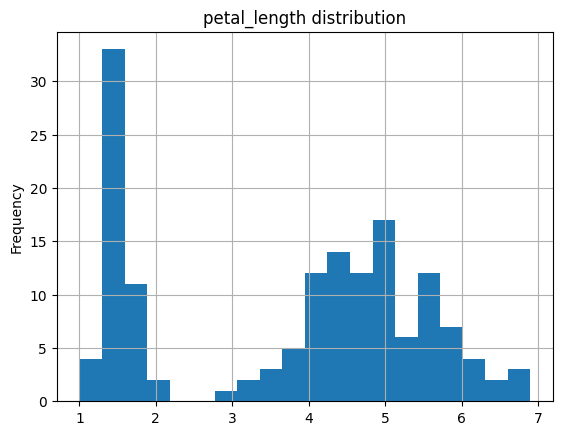

In [ ]:
df['petal_length'].hist(bins=20)
plt.title('petal_length distribution')
plt.ylabel("Frequency")
plt.show()

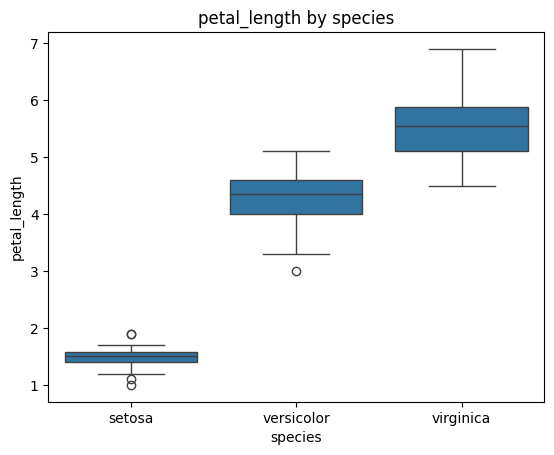

In [ ]:
sns.boxplot(x='species',y='petal_length',data=df)
plt.title('petal_length by species')
plt.show()

In [ ]:
import yfinance as yf
data=yf.download('AApl', start="2020-01-01", end="2024-01-01")


/tmp/ipython-input-4-317361436.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download('AApl', start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
stock="AAPL"
data=yf.download(stock,start="2020-1-1",end="2025-1-1")
print(data.head())

/tmp/ipython-input-8-3487071886.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock,start="2020-1-1",end="2025-1-1")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620842  72.681289  71.373218  71.627092  135480400
2020-01-03  71.914810  72.676439  71.689950  71.847110  146322800
2020-01-06  72.487854  72.526541  70.783256  71.034717  118387200
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000
2020-01-08  73.307503  73.609737  71.849525  71.849525  132079200


In [ ]:
data['Target']=data[('Close', 'AAPL')].shift(-1)
data=data.dropna()
x=data[['Open','High','Low','Volume']]
y=data['Target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


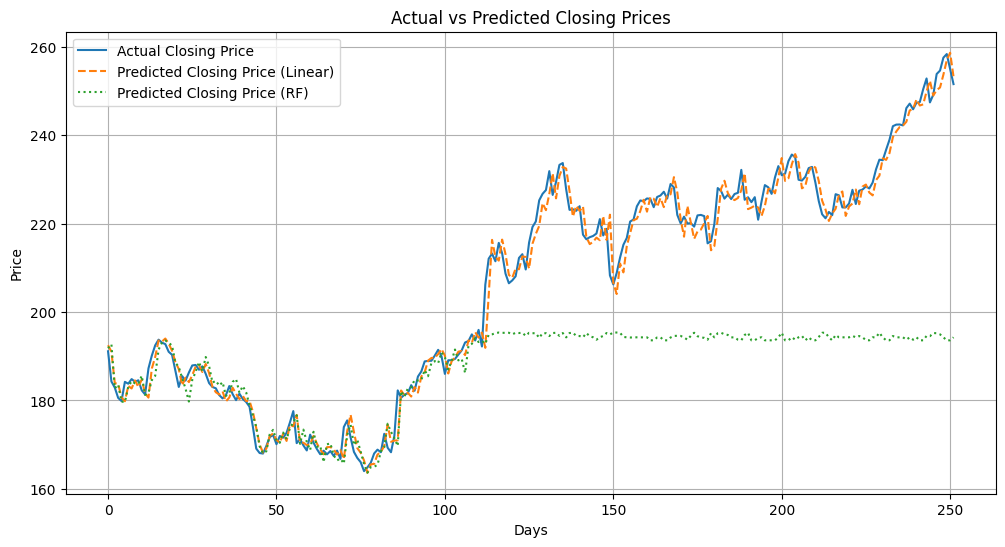

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Closing Price")
plt.plot(y_pred, label="Predicted Closing Price (Linear)", linestyle='--')
plt.plot(y_pred_rf, label="Predicted Closing Price (RF)", linestyle=':')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression R²:", r2_score(y_test, y_pred))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Linear Regression R²: 0.9850927743135751
Random Forest R²: -0.019769071944997885
